In [1]:
from netCDF4 import Dataset
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from cartopy.util import add_cyclic_point
from matplotlib import colors

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/home/users/zy1921/Ind_variables/')
print(os.getcwd())

/home/users/zy1921/Ind_variables


In [4]:
# esm-ssp585
# Load multiple files at once and getting variable names

files = ['Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc', 
        'Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_206501-210012.nc']
nc = nct.open_data(files)
print(nc.variables)

names = ', '.join(files)
print(names)

variable = regex.search(r"(?<=Data/Raw/)[^_]*", names).group()
print(variable)
model = regex.search(r"(?<=Data/Raw/.*?_.*?_)[^_]*", names).group()
print(model)
experiment = regex.search(r"(?<=Data/Raw/.*?_.*?_.*?_)[^_]*", names).group()
print(experiment)

start = 2015
end = 2100

['tas']
Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc, Data/Raw/tas_Amon_CESM2_esm-ssp585_r1i1p1f1_gn_206501-210012.nc
tas
CESM2
esm-ssp585


In [5]:
nc.merge("time")
nc.to_nc("Data/{}_{}_{}.nc".format(variable, model, experiment), overwrite = True)

### Difference Plot


In [14]:
# historial experiment 

historical = nct.open_data("Data/Raw/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc")
print(historical.contents)

historical.subset(year = range(1994, 2014))
historical.tmean()

new = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))
print(new.contents)

new.subset(year = range(2080, 2100))
new.tmean()

new.subtract(historical)

new.reduce_dims()
new.to_nc("Data/{}_{}_difference.nc".format(variable, model), overwrite = True)


/opt/jaspy/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
/opt/jaspy/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.


  variable  ntimes  npoints  nlevels                     long_name unit  \
0      tas    1980    55296        1  Near-Surface Air Temperature    K   

  data_type  
0      F32z  
  variable  ntimes  npoints  nlevels                     long_name unit  \
0      tas    1032    55296        1  Near-Surface Air Temperature    K   

  data_type  
0      F32z  


/home/users/zy1921/.local/lib/python3.8/site-packages/nctoolkit/add_etc.py:92: UserWarning: Use CDO>=1.9.10 for smarter operations


In [15]:
new = Dataset("Data/{}_{}_{}_20y.nc".format(variable, model, experiment))
#print(new.variables)
var_new = new.variables [variable][:]
print(var_new)

difference = Dataset("Data/{}_{}_difference.nc".format(variable, model), overwrite = True)
#print(difference.variables)
var_dif = difference.variables [variable][:]
print(var_dif)
print(np.amax(var_dif), np.amin(var_dif))

[[[234.05536 234.05536 234.05536 ... 234.05536 234.05534 234.05534]
  [234.5069  234.47275 234.32211 ... 234.52402 234.52206 234.51535]
  [234.93202 234.89833 234.8857  ... 235.14214 235.09781 235.03409]
  ...
  [270.8518  270.85977 270.8672  ... 270.83005 270.8372  270.844  ]
  [270.7808  270.78336 270.786   ... 270.77167 270.77505 270.77808]
  [270.73303 270.73328 270.73352 ... 270.73212 270.73245 270.73276]]]
[[ 7.7340546  7.7340546  7.7340546 ...  7.7340546  7.7340393  7.7340393]
 [ 7.782181   7.779068   7.7762604 ...  7.7905426  7.787674   7.784958 ]
 [ 7.7689514  7.7635345  7.7579193 ...  7.7845154  7.7792053  7.77417  ]
 ...
 [11.07724   11.069885  11.062836  ... 11.09671   11.090637  11.084503 ]
 [11.067383  11.064178  11.060852  ... 11.077545  11.074097  11.07074  ]
 [11.0868225 11.086578  11.086365  ... 11.0877075 11.087372  11.087097 ]]
13.03363 -0.8725281


In [ ]:
nc = Dataset("Data/{}_{}_difference.nc".format(variable, model), overwrite = True)
print(difference.variables)


lat = nc.variables['lat'][:] # [:] means all elements inside the list
lon = nc.variables['lon'][:]
print(len(lat), len(lon))


var = nc.variables [variable][:]
var_max = np.amax(var)
var_min = np.amin(var)
print(var_max, var_min)


var, lon = add_cyclic_point(var, coord=lon)

x, y = np.meshgrid(lon, lat)

{'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (288,)
filling off, 'lon_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (288, 2)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (192,)
filling off, 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (192, 2)
filling off, 'tas': <class 'netCDF4._netCDF4.Variable'>
float32 tas(lat, lon)
    standard_name: air_temperature
    long_name: Near-Surface Air Temperature
    units: K
    _FillValue: 1e+20
    missing_value: 1e+20
    cell_methods: area: time: mean
    cell_measures: area: ar

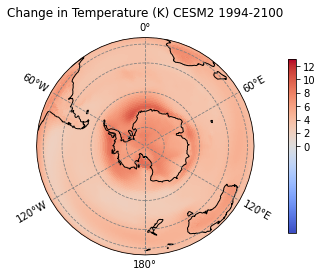

In [18]:
ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude = 0, 
                                                  central_latitude=-90))

plt.title("Change in Temperature (K) {} 1994-2100".format(model, start))
    
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)

divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )

cb = plt.colorbar(p, shrink=0.8, pad = 0.1)

gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--') 

ax.coastlines()

plt.savefig("output/{}_{}_{}_change.png".format(variable, model, experiment))

plt.show()

## Plotting map

### Max/min value for plotting 

In [7]:
file = "Data/{}_{}_{}.nc".format(variable, model, experiment)
nc = Dataset(file)

var = nc.variables [variable][:]
max_var = np.amax(var)
min_var = np.amin(var)

print(max_var)
print(min_var)

323.60443
206.6504


### 2015

In [6]:
data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))
data.select(year = start)
data.tmean()
data.to_nc("Data/{}_{}_{}_{}.nc".format(variable, model, experiment, start), overwrite = True)

In [21]:
file = "Data/{}_{}_{}_{}.nc".format(variable, model, experiment, start)
nc = Dataset(file)
print(nc.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (1,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1, 2)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (288,)
filling off, 'lon_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (288, 2)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (192,)
filling off, 'lat_bnds': <cl

In [22]:
lat = nc.variables['lat'][:] # [:] means all elements inside the list
lon = nc.variables['lon'][:]
var = nc.variables [variable][:]

print(len(lon), len(lat))

var, lon = add_cyclic_point(var, coord=lon)

mean_var = np.nanmean(var, axis = 0) 
print(mean_var.shape) 

x, y = np.meshgrid(lon, lat)
print(len(x), len(y))

288 192
(192, 289)
192 192


shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


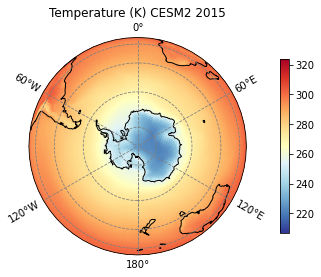

In [23]:
ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude = 0, 
                                                  central_latitude=-90))

plt.title("Temperature (K) {} {}".format(model, start))
    
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)


p = ax.pcolor(x, y, mean_var, vmax = max_var, vmin = min_var, 
              cmap = 'RdYlBu_r', transform = cartopy.crs.PlateCarree() )

cb = plt.colorbar(p, shrink=0.8, pad = 0.1)

gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--') 


plt.savefig("output/{}_{}_{}_{}.png".format(variable, model, experiment, start))

plt.show()


### 2100

In [14]:
data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))
data.select(year = end)
data.tmean()
data.to_nc("Data/{}_{}_{}_{}.nc".format(variable, model, experiment, end), overwrite = True)

In [24]:
file = "Data/{}_{}_{}_{}.nc".format(variable, model, experiment, end)
nc = Dataset(file)
print(nc.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (1,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1, 2)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (288,)
filling off, 'lon_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (288, 2)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (192,)
filling off, 'lat_bnds': <cl

In [25]:
lat = nc.variables['lat'][:] # [:] means all elements inside the list
lon = nc.variables['lon'][:]
var = nc.variables [variable][:]

var, lon = add_cyclic_point(var, coord=lon)

mean_var = np.nanmean(var, axis = 0) 
print(mean_var.shape) 

x, y = np.meshgrid(lon, lat)

(192, 289)


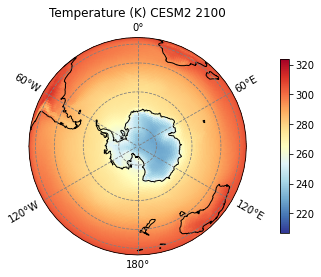

In [26]:
ax = plt.axes(projection=cartopy.crs.Orthographic(central_longitude = 0, 
                                                  central_latitude=-90))

plt.title("Temperature (K) {} {}".format(model, end))
    
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)


p = ax.pcolor(x, y, mean_var, vmax = max_var, vmin = min_var, 
              cmap = 'RdYlBu_r', transform = cartopy.crs.PlateCarree() )

cb = plt.colorbar(p, shrink=0.8, pad = 0.1)

gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--') 


plt.savefig("output/{}_{}_{}_{}.png".format(variable, model, experiment, end))

plt.show()


## Time series

In [8]:
# Join the two files with time 

data = nct.open_data("Data/{}_{}_{}.nc".format(variable, model, experiment))

time = data.years
time = tuple(time)
len(time)

86

In [10]:
# Select regions 40S south 

data.crop(lon = [-180, 180], lat = [-90, -40])
data.assign(space = lambda x: spatial_mean(x.tas), drop = True)
data.rename({"space":"{}".format(variable)})
print(data.variables_detailed)
data.to_nc("Data/{}_{}_{}_40S.nc".format(variable, model, experiment), overwrite = True)

AttributeError: 'DataSet' object has no attribute 'variables_detailed'

In [25]:
!cdo -yearmean Data/{variable}_{model}_{experiment}_40S.nc Data/{variable}_{model}_{experiment}_40S_mean.nc

cdo    yearmean: Processed 1 variable over 1117 timesteps [0.16s 172MB].


In [26]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_40S_mean.nc".format(variable, model, experiment))
print(nc.variables)
var_mean = nc.variables[variable][:]
print(var_mean.shape)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    bounds: time_bnds
    units: days since 0001-01-01 00:00:00
    calendar: 365_day
    axis: T
unlimited dimensions: time
current shape = (86,)
filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (86, 2)
filling off, 'tas': <class 'netCDF4._netCDF4.Variable'>
float32 tas(time)
    _FillValue: 1e+20
    missing_value: 1e+20
    cell_methods: time: mean
unlimited dimensions: time
current shape = (86,)
filling off}
(86,)


In [9]:
!cdo -yearmax Data/{variable}_{model}_{experiment}_40S.nc Data/{variable}_{model}_{experiment}_40S_max.nc
!cdo -yearmin Data/{variable}_{model}_{experiment}_40S.nc Data/{variable}_{model}_{experiment}_40S_min.nc

cdo    yearmax: Processed 1 variable over 1117 timesteps [0.10s 131MB].
cdo    yearmin: Processed 1 variable over 1117 timesteps [0.16s 131MB].


In [13]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_40S_min.nc".format(variable, model, experiment))
             
var_min = nc.variables[variable][:]
time_min= nc.variables['time'][:]
print(var_min.shape)

(86,)


In [14]:
# Load new file: 
nc = Dataset("Data/{}_{}_{}_40S_max.nc".format(variable, model, experiment))
             
var_max = nc.variables[variable][:]
time_max= nc.variables['time'][:]
print(var_max.shape)

(86,)


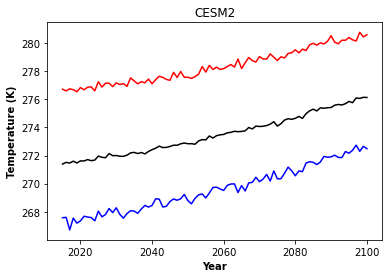

In [17]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
ax.plot(time, var_max, 'r')
ax.plot(time, var_min, 'b')

ax.title.set_text("{}".format(model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Temperature (K)")
plt.xlabel("Year")

plt.savefig("output/{}_{}_{}_projection.png".format(variable, model, experiment))

plt.show()